**Multiple Linear Regression**

Predict the price of Toyota Corolla using Multiple Linear Regression.


Performing EDA

In [18]:
import pandas as pd
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


Checking null values from the given data


In [19]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [20]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


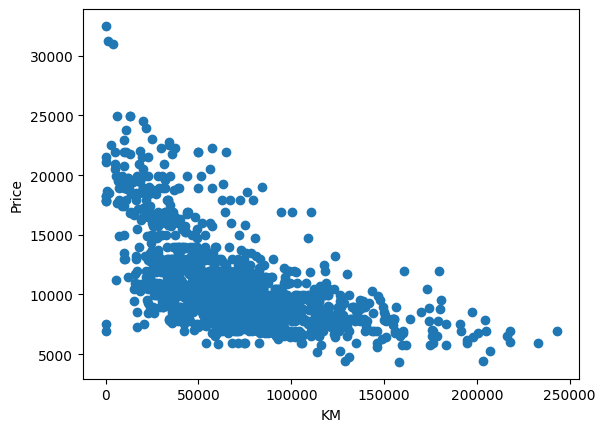

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['KM'],df['Price'])
plt.xlabel('KM')
plt.ylabel('Price')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])

In [24]:
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


In [25]:
from sklearn.preprocessing import StandardScaler
num_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
scaler = StandardScaler()
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


Train-Test Split

In [26]:
Y=df["Price"]
X=df[['Age_08_04','KM','HP','Weight']]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Multiple linear regression model using the training dataset.**

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [29]:
y_pred=model.predict(X_test)

**Interpret the coefficients of the model**

In [30]:
model.coef_

array([-1.20025405e+02, -2.02325920e-02,  2.90521704e+01,  1.97690662e+01])

Finding the best accuracy from the given data set

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score,log_loss
mean=mean_squared_error(Y_test,y_pred)
rmse=root_mean_squared_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print("Mean Squared Error:",np.round(mean,2))
print("Root Mean Squared Error:",np.round(rmse,2))
print("R2 Score:",round(r2,2))

Mean Squared Error: 1993321.01
Root Mean Squared Error: 1411.85
R2 Score: 0.85


In [32]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+Weight',data=df).fit()
np.round(model.rsquared,2)

np.float64(0.86)

Performing the **Lasso and Ridge** menthods for the heighest accuracy score

# Ridge Regression

In [33]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
import numpy as np

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
y_pred_ridge = ridge.predict(X_test)

mean_ridge = mean_squared_error(Y_test, y_pred_ridge)
rmse_ridge = root_mean_squared_error(Y_test, y_pred_ridge)
r2_ridge = r2_score(Y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print("Mean Squared Error:", np.round(mean_ridge, 2))
print("Root Mean Squared Error:", np.round(rmse_ridge, 2))
print("R2 Score:", round(r2_ridge, 2))

Ridge Regression Metrics:
Mean Squared Error: 1993323.7
Root Mean Squared Error: 1411.85
R2 Score: 0.85


# Lasso Regression

In [34]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, Y_train)
y_pred_lasso = lasso.predict(X_test)

mean_lasso = mean_squared_error(Y_test, y_pred_lasso)
rmse_lasso = root_mean_squared_error(Y_test, y_pred_lasso)
r2_lasso = r2_score(Y_test, y_pred_lasso)

print("\nLasso Regression Metrics:")
print("Mean Squared Error:", np.round(mean_lasso, 2))
print("Root Mean Squared Error:", np.round(rmse_lasso, 2))
print("R2 Score:", round(r2_lasso, 2))


Lasso Regression Metrics:
Mean Squared Error: 1993344.07
Root Mean Squared Error: 1411.86
R2 Score: 0.85


#1.What is Normalization & Standardization and how is it helpful?

**Normalization :**Scaling the data values from 0 to 1.To fix the range

When features have different units or scales.

**Standardization :**Scaling the data values from -3 to +3.To fix the range

When data has varying scales and outliers.

Algorithms like Linear Regression, Logistic Regression, PCA perform better with standardized data.